

UPRAK - NLP - SENTIMENT ANALISYS

(Analisa Sentiment menggunakan Algoritma Logistic Regression)

Nama : Salsa Dwi Nur Hidayah

Kelas : Goldfarb

# 01 Import Library dan Dataset

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_tweet_sentimen_tayangan_tv.csv')
df

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7
...,...,...,...,...,...
395,396,negative,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...
396,397,negative,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...
397,398,negative,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,399,negative,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...


In [10]:
df = pd.DataFrame(df,columns=["Sentiment","Text Tweet"])
df.columns = ['Sentiment','tweet']
df

,Sentiment,tweet
0,positive,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,positive,Selamat berbuka puasa Semoga amal ibadah hari ...
2,positive,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,positive,selamat ya mas @adietaufan masuk hitamputih
4,positive,Asiknya nonton Hitam Putih Trans7
...,...,...
395,negative,ini apa banget deh gw paling kesel klo orang2 ...
396,negative,Orang miskin semakin miskin klo sekolah melaku...
397,negative,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,negative,dr penampilan saja kyk preman taunya bkin kisr...


# 02 Data Acquissition

In [11]:
df["Sentiment"] = np.where(df["Sentiment"] == "negative", 0, 1)
df

,Sentiment,tweet
0,1,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,1,Selamat berbuka puasa Semoga amal ibadah hari ...
2,1,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,1,selamat ya mas @adietaufan masuk hitamputih
4,1,Asiknya nonton Hitam Putih Trans7
...,...,...
395,0,ini apa banget deh gw paling kesel klo orang2 ...
396,0,Orang miskin semakin miskin klo sekolah melaku...
397,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,0,dr penampilan saja kyk preman taunya bkin kisr...


In [12]:
print('Retweet :', df.shape[0], 'data\n')
print('terdiri dari (sentimen):')
print('-- [0] positive \t:', df[df.Sentiment == 1].shape[0], 'data')
print('-- [1] negative\t\t:', df[df.Sentiment == 0].shape[0], 'data\n')

Retweet : 400 data

terdiri dari (sentimen):
-- [0] positive 	: 200 data
-- [1] negative		: 200 data



([<matplotlib.axis.XTick at 0x7ff409790a10>,
 [Text(0, 0, 'positive'), Text(0, 0, 'negative')])

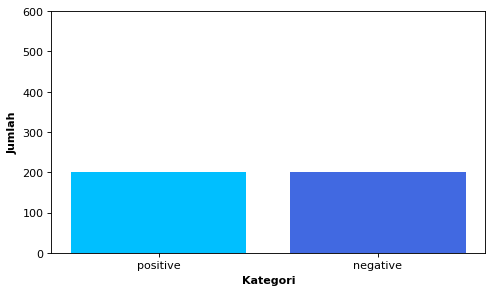

In [13]:
height = df['Sentiment'].value_counts()
labels = ('positive', 'negative')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)

# 03 Text Preprocessing

## Case Folding

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import re

def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

In [16]:
raw_sample = df['tweet'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih
Case folding	:  trans acara paling komplit dan menarik apalagi ada hitam putih


## Slang Word Normalization

In [17]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-10-06 13:52:32--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.004s  

2022-10-06 13:52:32 (17.5 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [18]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [19]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [21]:
len(stopwords_ind)

758

In [22]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind[:20]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara']

In [23]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['tsel', 'gb', 'rb']                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [24]:
raw_sample = df['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih
Case folding		:  trans acara paling komplit dan menarik apalagi ada hitam putih
Stopword removal	:  trans acara komplit menarik hitam putih


## Stemming

In [25]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 15.9 MB/s 


In [26]:
f= open('/content/drive/MyDrive/Dataset/stopwordlist.txt')
ina_stopword = f.read()

tempStoplist = []
for tempstp in ina_stopword.split():
  tempStoplist.append(tempstp)

In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [28]:
TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+"

def preprocessing(tweet):
  tweet = re.sub(TEXT_CLEANING_RE,'',str(tweet).lower()).strip()
  tokens = []
  for token in tweet.split():
    if token not in tempStoplist:
      token = stemmer.stem(token)
      tokens.append(token)
  return " ".join(tokens)

In [29]:
raw_sample = df['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih
Case folding		:  trans acara paling komplit dan menarik apalagi ada hitam putih
Stopword removal	:  trans acara komplit menarik hitam putih
Stemming		:  trans acara komplit tarik hitam putih


## Text Preproccesing Pipeline

In [30]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = stemming(text)
  return text

In [31]:
%%time
df['clean_teks'] = df['tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 1min 23s, sys: 227 ms, total: 1min 23s
Wall time: 1min 31s


In [32]:
df.to_csv('clean_teks.csv')


Nahh, disini dalam proses preprocessing memakan waktu yang lama, yaitu sekitar 3 menit.

# 04 Feature Engineering

In [33]:
# Pisahkan kolom fitur dan target
X = df['clean_teks']
y = df['Sentiment']

In [34]:
X

0      undang n shanijkt ke hitamputih menang ssk jak...
1      selamat buka puasa moga amal ibadah hari ni te...
2      ada nih di trans hitam putih dia dapat harga j...
3             selamat ya mas adietaufan masuk hitamputih
4                       asiknya nonton hitam putih trans
                             ...                        
395    ini apa banget deh saya paling kesel kalau ora...
396    orang miskin makin miskin kalau sekolah laku p...
397    tidak boleh emosi cepat tua nonton matanajwame...
398    dari tampil saja seperti preman tau bkin kisru...
399    jawab saja tidak usah berbelitbelit putar tida...
Name: clean_teks, Length: 400, dtype: object

In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Sentiment, Length: 400, dtype: int64

## Feature Extraction (TF-IDF)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(3,3))
tf_idf.fit(X)

TfidfVectorizer(ngram_range=(3, 3))

In [37]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

3576


In [38]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aa gym moga' 'aa gym sejuk' 'aa gymnastiar ilc' ... 'yuk tweeps rapat'
 'yukikatou nongol juga' 'zaitun rasmin ilc']


In [39]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
# Melihat matriks jumlah token menggunakan TF IDF
df_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
df_tf_idf

,aa gym moga,aa gym sejuk,aa gymnastiar ilc,aagym tidak ada,abang acara botak,abas anjay bener,abi manyu kasihan,abraham samad inspirasi,abraham slamet jika,academi pintar nyanyi,...,yang uji itu,yang ulas hal,yang undang pasti,yang urus miskin,younglex sudah begitu,yuk nonton mata,yuk tonton tvone,yuk tweeps rapat,yukikatou nongol juga,zaitun rasmin ilc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:

with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## Fitur Selection (Chi-Square)


In [42]:
X = np.array(df_tf_idf)
y = np.array(y)

In [43]:

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 3576
Reduced feature number: 1000


In [44]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
df_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
df_chi2

,nilai
0,0.277350
1,0.447214
2,0.408248
3,0.277350
4,0.447214
...,...
3571,0.310696
3572,0.408248
3573,0.381373
3574,0.327233


In [45]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
df_chi2['fitur'] = feature
df_chi2

,nilai,fitur
0,0.277350,aa gym moga
1,0.447214,aa gym sejuk
2,0.408248,aa gymnastiar ilc
3,0.277350,aagym tidak ada
4,0.447214,abang acara botak
...,...,...
3571,0.310696,yuk nonton mata
3572,0.408248,yuk tonton tvone
3573,0.381373,yuk tweeps rapat
3574,0.327233,yukikatou nongol juga


In [46]:
# Mengurutkan fitur terbaik
df_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
15,1.349550,acara hitam putih
1868,1.309977,luar biasa matanajwametrotv
3525,1.243503,yang luar biasa
3311,1.235889,trans hitam putih
1111,1.096380,hitam putih trans
...,...,...
1564,0.001897,ke hitam putih
3119,0.000934,televisi emang televisi
2090,0.000934,metro televisi emang
2372,0.000457,orang yang sudah


In [47]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False,  True,  True, ...,  True, False,  True])

In [48]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aa gym sejuk',
 'aa gymnastiar ilc',
 'abang acara botak',
 'abas anjay bener',
 'acara botak ini',
 'acara debat yag',
 'acara hitam putih',
 'acara mata tajam',
 'acara televisi yang',
 'acara yang sangat',
 'ada di posisi',
 'ada hanya orang',
 'ada job di',
 'ada orang bodoh',
 'ada stefanlilipaly andik',
 'ada yang urus',
 'adalah akar jahat',
 'adalah hak segala',
 'adalah juang yang',
 'adalah pribadi yang',
 'adem hati aa',
 'adietaufan masuk hitamputih',
 'agung akan undang',
 'agung tuhan itu',
 'ahmad dhani ngomong',
 'ahok anis di',
 'ahok karena orang',
 'ahok matanajwametrotv hutjekardah',
 'ajang orangorang saling',
 'ajar akan jadi',
 'ajar cara debat',
 'ajar dari gusdur',
 'ajarin dewan ttg',
 'akan jadi bodoh',
 'akan mati seram',
 'akan sayang kickandy',
 'akan uang adalah',
 'akan undang untuk',
 'akar jahat ilctvone',
 'akibatya padat rayap',
 'al misbah mata',
 'alam akan sayang',
 'alam niscaya alam',
 'amat taxamnesti ilctvone',
 'ambil waktu untuk',
 'anak k

In [49]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [50]:
kbest_feature

{'trans hitam putih': 3311,
 'selamat ya mas': 2871,
 'ya mas adietaufan': 3466,
 'mas adietaufan masuk': 1957,
 'adietaufan masuk hitamputih': 71,
 'asiknya nonton hitam': 242,
 'nonton hitam putih': 2274,
 'hitam putih trans': 1111,
 'trans acara paling': 3307,
 'paling komplit dan': 2431,
 'komplit dan tarik': 1720,
 'dan tarik apalagi': 715,
 'tarik apalagi ada': 3082,
 'hitam putih inspiratif': 1100,
 'putih inspiratif banget': 2583,
 'suka banget dengan': 3017,
 'banget dengan acara': 308,
 'dengan acara hitam': 782,
 'acara hitam putih': 15,
 'keren kamu bro': 1620,
 'kamu bro hitamputihtrans': 1489,
 'hitam putih di': 1096,
 'putih di trans': 2580,
 'cinta ikat silaturahmi': 620,
 'ikat silaturahmi di': 1150,
 'silaturahmi di hati': 2956,
 'di hati lunamaya': 843,
 'hati lunamaya hitamputihtrans': 1070,
 'moga lancar hitamputihtrans': 2149,
 'hitam putih baik': 1094,
 'hitam putih paling': 1106,
 'putih paling bagus': 2589,
 'paling bagus buat': 2426,
 'bagus buat di': 276,
 'b

In [51]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aa gym sejuk,aa gymnastiar ilc,abang acara botak,abas anjay bener,acara botak ini,acara debat yag,acara hitam putih,acara mata tajam,acara televisi yang,acara yang sangat,...,yang nonton hitamputiht,yang sangat inspirasi,yang sangat saya,yang tidak ada,yang tidak sesuai,yang undang pasti,yang urus miskin,yuk tonton tvone,yuk tweeps rapat,zaitun rasmin ilc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# 05 Modelling 


# Machine Learning (Logistic Regression)

In [53]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss

vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
features = vectorizer.fit_transform(df.clean_teks)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.1, random_state=8)

LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(X_train, y_train)

CPU times: user 36.4 ms, sys: 1.01 ms, total: 37.4 ms
Wall time: 34.9 ms


# Evaluasi

In [54]:
yhat = LR_.predict(X_test)
print('F1 score : ', f1_score(y_test, yhat, average='weighted'))

yhat_prob = LR_.predict_proba(X_test)
print('Log Loss : ', log_loss(y_test,yhat_prob))

F1 score :  0.8778207607994842
Log Loss :  0.35694987604210954


# Deep Learning (LSTM)





Memilih panjang Sequence(max_lenght)

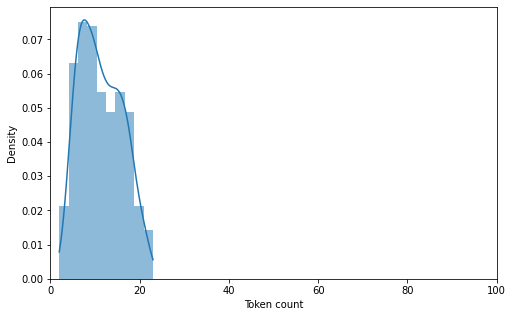

In [55]:
token_lens = []

for text in df['clean_teks']:
    tokens = text.split()
    token_lens.append(len(tokens))

plt.figure(figsize=(8, 5))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [56]:
MAX_SEQ_LENGTH = 30

## Preparing Data for Embedding 

**Tokenzing Data**

In [57]:
from keras.preprocessing.text import Tokenizer
NUM_WORDS = 100       # Frekuensi kemunculan kata. Hanya num_words-1 yang akan disimpan pada dictionary. Berarti kata dengan kemunculan <=num_words tidak digunakan.
OOV_TOKEN = '<unk>'   # Token khusus untuk mengganti kata yang tidak terdaftar dalam dictionary.

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN, lower=True, split=' ')
tokenizer.fit_on_texts(df['clean_teks'])

# Tambahkan token padding untuk menyamakan ukuran dimensi embedding layer
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

WV_DICTIONARY = tokenizer.word_index

WV_DICTIONARY_SIZE = len(WV_DICTIONARY)
print(WV_DICTIONARY_SIZE) # Lihat kata unik pada dictionary yang dihasilkan

1353


In [58]:
WV_DICTIONARY

{'<unk>': 1,
 'yang': 2,
 'di': 3,
 'tidak': 4,
 'kickandy': 5,
 'mata': 6,
 'najwa': 7,
 'ilc': 8,
 'dan': 9,
 'ilctvone': 10,
 'ini': 11,
 'matanajwametrotv': 12,
 'hitamputiht': 13,
 'orang': 14,
 'hitam': 15,
 'putih': 16,
 'acara': 17,
 'metro': 18,
 'jadi': 19,
 'saya': 20,
 'itu': 21,
 'ada': 22,
 'trans': 23,
 'keren': 24,
 'pak': 25,
 'nonton': 26,
 'lihat': 27,
 'dengan': 28,
 'televisi': 29,
 'kalau': 30,
 'sudah': 31,
 'untuk': 32,
 'sama': 33,
 'saja': 34,
 'banget': 35,
 'dari': 36,
 'indonesia': 37,
 'kita': 38,
 'ahok': 39,
 'lebih': 40,
 'tv': 41,
 'kickandymetrotv': 42,
 'lagi': 43,
 'inspirasi': 44,
 'banyak': 45,
 'karena': 46,
 'bisa': 47,
 'malam': 48,
 'hitamputihtrans': 49,
 'seperti': 50,
 'selalu': 51,
 'nya': 52,
 'akan': 53,
 'undang': 54,
 'anak': 55,
 'hitamputih': 56,
 'moga': 57,
 'ya': 58,
 'tetapi': 59,
 'bukan': 60,
 'jangan': 61,
 'andy': 62,
 'suka': 63,
 'kamu': 64,
 'makin': 65,
 'sangat': 66,
 'miris': 67,
 'kok': 68,
 'harus': 69,
 'juga': 70,
 

## Text to Sequence

In [59]:
# Proses mengubah token hasil tokenisasi menjadi urutan bilangan int berdasarkan index dictionary.
df_seq = tokenizer.texts_to_sequences(df['clean_teks'])

In [60]:
# Lihat hasil setelah di ubah menjadi sequences
print(df['clean_teks'][10])
print(df_seq[10])

cinta ikat silaturahmi di hati lunamaya hitamputihtrans
[1, 1, 1, 3, 1, 1, 49]


## Add Padding & Truncation

In [61]:
from keras.preprocessing.sequence import pad_sequences

In [62]:
PADDING = 'post'        # Berikan padding untuk setiap sequences. Terdapat dua pilihan dalam melakukan padding 'pre' or 'post'.
TRUNCATING = 'post'     # Menghapus token dari sequences yang lebih besar dari max_lenght. Terdapat dua pilihan dalam melakukan truncanting 'pre' or 'post'.

df_pad = pad_sequences(df_seq, maxlen=MAX_SEQ_LENGTH, padding=PADDING, truncating=TRUNCATING)

In [63]:
print(df['clean_teks'][10])
print(df_seq[10])
print(df_pad[10])

cinta ikat silaturahmi di hati lunamaya hitamputihtrans
[1, 1, 1, 3, 1, 1, 49]
[ 1  1  1  3  1  1 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


## One-hot Encoding

In [64]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(df['Sentiment'], num_classes=len(df['Sentiment'].unique()))  # Lakukan one-hot encoding pada label (y)

In [65]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## Train & Test Data Splitting

In [66]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.initializers import Constant
import seaborn as sns
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df_pad, Y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((320, 30), (80, 30), (320, 2), (80, 2))

In [67]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(              # Buat embedding layer yang menerima panjang dictionary hasil Tokenisasi
    input_dim = WV_DICTIONARY_SIZE,
    input_length = MAX_SEQ_LENGTH,
    output_dim = 64))      
model_LSTM.add(LSTM(64))                # Tambahkan satu layer LSTM
model_LSTM.add(Dropout(0.5))                             
model_LSTM.add(Dense(2, activation='softmax'))

In [68]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 64)            86592     
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 119,746
Trainable params: 119,746
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

## Training

In [70]:
%%time

EPOCH = 20
BATCH_SIZE = 32


history_LSTM = model_LSTM.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/20
10/10 [==============================] - 3s 91ms/step - loss: 0.6930 - accuracy: 0.4844 - val_loss: 0.6934 - val_accuracy: 0.4875
Epoch 2/20
10/10 [==============================] - 0s 24ms/step - loss: 0.6906 - accuracy: 0.5531 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6842 - accuracy: 0.6125 - val_loss: 0.6801 - val_accuracy: 0.5750
Epoch 4/20
10/10 [==============================] - 0s 26ms/step - loss: 0.6033 - accuracy: 0.6938 - val_loss: 0.6966 - val_accuracy: 0.6000
Epoch 5/20
10/10 [==============================] - 0s 25ms/step - loss: 0.5136 - accuracy: 0.7688 - val_loss: 0.6722 - val_accuracy: 0.6750
Epoch 6/20
10/10 [==============================] - 0s 24ms/step - loss: 0.4589 - accuracy: 0.8125 - val_loss: 0.5405 - val_accuracy: 0.7375
Epoch 7/20
10/10 [==============================] - 0s 25ms/step - loss: 0.3513 - accuracy: 0.8719 - val_loss: 0.4904 - val_accuracy: 0.7750
Epoch 8/20
10

In [71]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

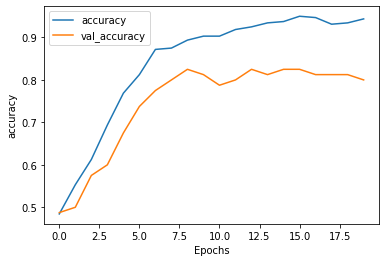

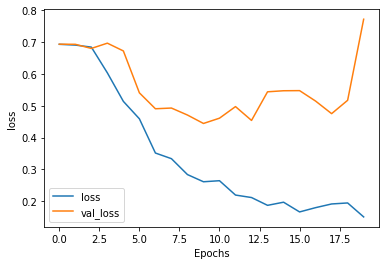

In [72]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [73]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.484375 	   0.693022 	   0.487500 	   0.693407
       2   0.553125 	   0.690607 	   0.500000 	   0.693045
       3   0.612500 	   0.684246 	   0.575000 	   0.680070
       4   0.693750 	   0.603339 	   0.600000 	   0.696632
       5   0.768750 	   0.513637 	   0.675000 	   0.672187
       6   0.812500 	   0.458863 	   0.737500 	   0.540479
       7   0.871875 	   0.351303 	   0.775000 	   0.490450
       8   0.875000 	   0.333533 	   0.800000 	   0.492672
       9   0.893750 	   0.283561 	   0.825000 	   0.470724
      10   0.903125 	   0.260960 	   0.812500 	   0.444205
      11   0.903125 	   0.264254 	   0.787500 	   0.460825
      12   0.918750 	   0.219146 	   0.800000 	   0.497230
      13   0.925000 	   0.211360 	   0.825000 	   0.453765
      14   0.934375 	   0.186846 	   0.812500 	   0.543738
      15   0.937500 	   0.196690 	   0.825000 	   0.547069
      16   0.950000 	   0.166113 	   0.825000 

# Evaluasi

In [74]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_LSTM.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_LSTM.evaluate(X_test, y_test)

3/3 [==============================] - 0s 15ms/step - loss: 0.7718 - accuracy: 0.8000


# 07(End Process : Prediction of Data Testing)

## Testing Prediksi

## Prediction

In [75]:
df_test = df.drop("Sentiment", axis =1)

In [76]:
df_test = df_test.drop("clean_teks", axis =1)

In [77]:
df_test.head()

,tweet
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,Selamat berbuka puasa Semoga amal ibadah hari ...
2,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,selamat ya mas @adietaufan masuk hitamputih
4,Asiknya nonton Hitam Putih Trans7


In [78]:
df_test['clean_teks'] = df_test.tweet.apply(lambda x: preprocessing(x))
df_test['clean_teks'] = df_test.clean_teks.str.replace('rt','')
df_test.head()

,tweet,clean_teks
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n shanijkt48 ke hitamputih menang ssk j...
1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat buka puasa moga amal ibadah hari ni te...
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans7 hitam putih dia dpt harga ju...
3,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih
4,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans7


In [79]:
#Melakukan training
def training_step(data, vectorizer):
  features = vectorizer.fit_transform(df.clean_teks)
  LR_ = LogisticRegression(C=2, solver='liblinear', max_iter=150).fit(features,y)
  return LR_

classifier = training_step(df.clean_teks, vectorizer)
result = classifier.predict(vectorizer.transform(df_test.clean_teks))

In [80]:
def training_step(data, vectorizer) :
    features = vectorizer.fit_transform(df.clean_teks)
    LR_ = LogisticRegression(C = 2, solver='liblinear', max_iter=150).fit(features,y)
    return LR_

classifier = training_step(df.clean_teks, vectorizer)
result = classifier.predict(vectorizer.transform(df_test.clean_teks))

In [81]:
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [82]:
np.savetxt('hasil_prediksi.teks', result, fmt='%s', delimiter='\n')

In [83]:
df_hasil = pd.read_csv(r'hasil_prediksi.teks')
df_hasil

,1
0,1
1,1
2,1
3,1
4,1
...,...
394,1
395,0
396,0
397,0


In [84]:
def prediksi_komentar(comment):
  result = classifier.predict(vectorizer.transform([comment]))
  if result == "1" :
    return "1"
  else :
    return "0"

In [86]:
prediksi_komentar('cinta itu agung')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


'0'

#~ Sekian dan Terimakasih